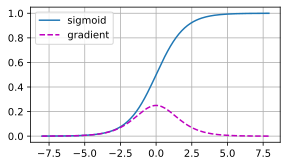

In [1]:
# 梯度消失
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(),
         [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'],
         figsize=(4.5, 2.5))

In [2]:
# 梯度爆炸
M = torch.normal(0, 1, size=(4, 4))
print('⼀个矩阵 \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))
    
print('乘以100个矩阵后\n', M)

⼀个矩阵 
 tensor([[-1.3262, -0.9540,  1.3245,  0.1717],
        [-0.2450,  2.4546, -1.1661,  0.6674],
        [ 0.6999, -0.7773,  0.2189, -1.4126],
        [-0.2448,  0.1671, -0.7679,  0.3008]])
乘以100个矩阵后
 tensor([[ 3.8205e+22, -5.8330e+22, -1.5624e+22, -1.0877e+22],
        [-4.8884e+22,  7.4636e+22,  1.9992e+22,  1.3918e+22],
        [ 9.7623e+21, -1.4905e+22, -3.9924e+21, -2.7794e+21],
        [-6.6622e+20,  1.0172e+21,  2.7246e+20,  1.8968e+20]])


⼩结<br>
• 梯度消失和梯度爆炸是深度⽹络中常⻅的问题。在参数初始化时需要⾮常小⼼，以确保梯度和参数可以得到很好的控制。<br>
• 需要⽤启发式的初始化⽅法来确保初始梯度既不太⼤也不太小。<br>
• ReLU激活函数缓解了梯度消失问题，这样可以加速收敛。<br>
• 随机初始化是保证在进⾏优化前打破对称性的关键。<br>
• Xavier初始化表明，对于每⼀层，输出的⽅差不受输⼊数量的影响，任何梯度的⽅差不受输出数量的影响。

练习
1. 除了多层感知机的排列对称性之外，你能设计出其他神经⽹络可能会表现出对称性且需要被打破的情况吗？
2. 我们是否可以将线性回归或softmax回归中的所有权重参数初始化为相同的值？
3. 在相关资料中查找两个矩阵乘积特征值的解析界。这对确保梯度条件合适有什么启⽰？
4. 如果我们知道某些项是发散的，我们能在事后修正吗？看看关于按层⾃适应速率缩放的论⽂[You et al., 2017]。